In [57]:
import numpy as np
import matplotlib.pyplot as plt

Métodos:
* Retângulo
* Trapézio
* Ponto Médio
* Simpson

Simpson
- (1,4,1)/6
- (2M + T)/3

Funções a integrar
* exp [0,1]
* log [1,2]
* cos [2,3]
* 1/(1 + x^2) [-1,1]
* exp(-x^2/2) [0,1], [0,2], [0,3] 

In [58]:
def retangulo(f, a, b, n=1000):
  xs = np.linspace(a, b, n, endpoint=False)
  fxs = f(xs)
  return sum(fxs)*(b-a)/n

In [59]:
def trapezio(f, a, b, n=1000):
  xs = np.linspace(a, b, n + 1, endpoint=True)
  h2 = (b-a)/(2*n)
  fxs = f(xs)
  y1 = fxs[1:]
  y2 = fxs[:-1]

  return sum((y1 + y2))*h2

In [60]:
np.exp(1) - 1 - trapezio(np.exp, 0, 1, 1000)

-1.431901508475164e-07

In [61]:
def pontoMedio(f, a, b, n=1000):
  x1 = np.linspace(a, b, n, endpoint=False)
  h = (b-a)/n

  h2 = (b-a)/(2*n)
  xs = x1 + h2
  fxs = f(xs)


  return sum(fxs)*h

In [62]:
np.exp(1) - 1 - pontoMedio(np.exp, 0, 1, 1000)

7.159507431353518e-08

In [63]:
def simpson(f, a, b, n=100):
  return (2*pontoMedio(f, a, b, n) + trapezio(f, a, b, n))/3

In [69]:
def generateGraph(f, a, b, intAna, en=7):
  ns = np.logspace(1, en, 12, dtype=int, base=10)

  tys = [abs(intAna - retangulo(f, a, b, int(n))) for n in ns]
  plt.plot(ns, tys, '-', label='Retangulo', linewidth=3)

  tys = [abs(intAna - trapezio(f, a, b, int(n))) for n in ns]
  plt.plot(ns, tys, '*-', label='Trapezio')

  tys = [abs(intAna - simpson(f, a, b, int(n))) for n in ns]
  plt.plot(ns, tys, 'o-', label='Simpson')

  tys = [abs(intAna - pontoMedio(f, a, b, int(n))) for n in ns]
  plt.plot(ns, tys, '-', label='ponto médio')

  plt.xscale('log')
  plt.yscale('log')
  plt.title(f"Erro da integral da função {f.__name__} de {a} a {b} em função do número de pontos")
  plt.xlabel("Número de pontos")
  plt.ylabel("Erro")
  plt.grid()
  plt.legend()

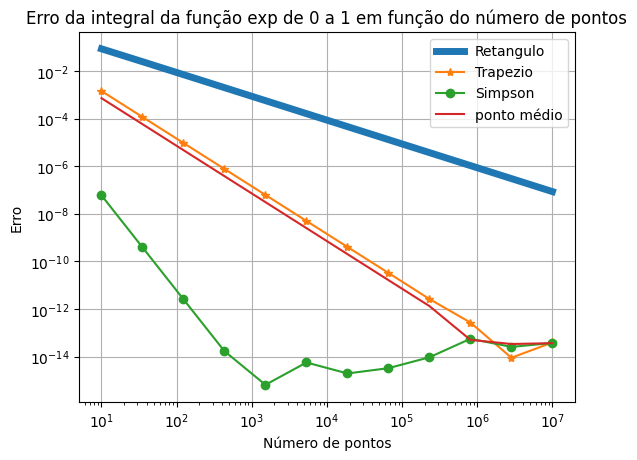

In [65]:
generateGraph(np.exp, 0, 1, np.exp(1) - 1)

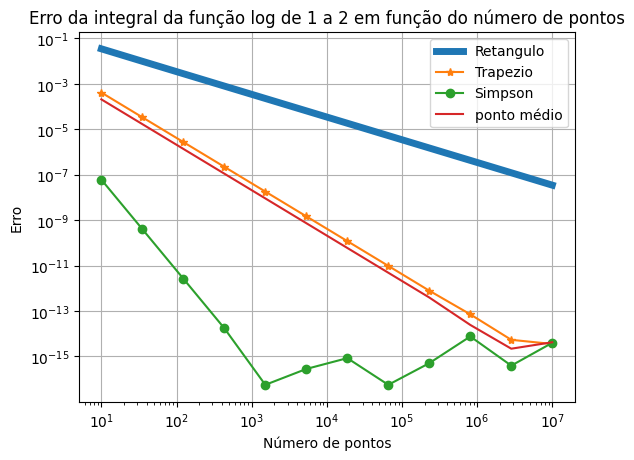

In [66]:
generateGraph(np.log, 1, 2, np.log(4) - 1)

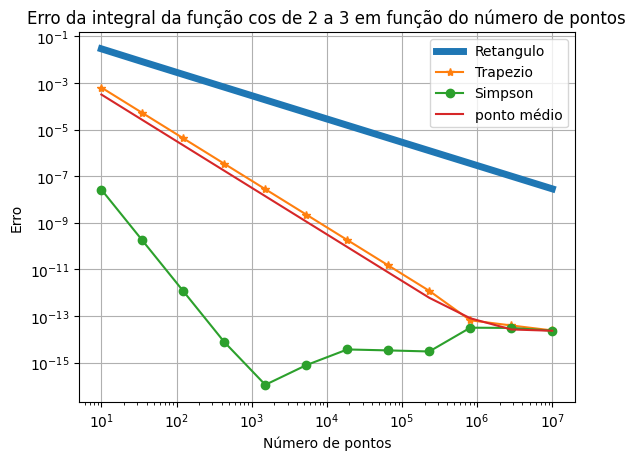

In [67]:
generateGraph(np.cos, 2, 3, np.sin(3) - np.sin(2))

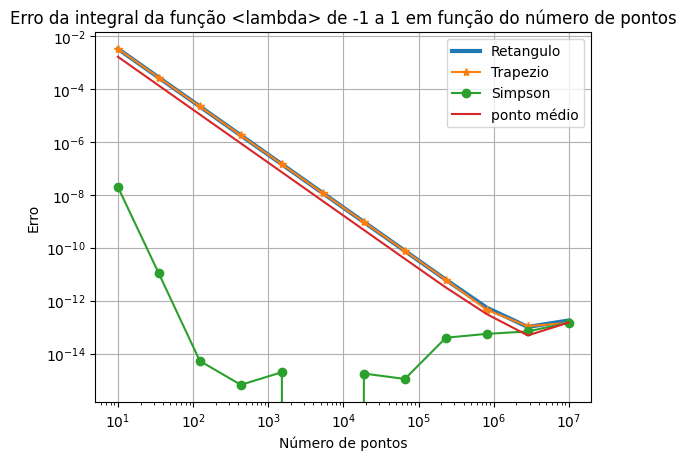

In [70]:
generateGraph(lambda x: 1/(1 + x**2), -1, 1, np.pi/2)

In [73]:
def simpsonImpossible(f, a, b, en=7):  
  ns = np.logspace(1, en, 12, dtype=int, base=10)

  tys = [simpson(f, a, b, int(n)) for n in ns]
  plt.plot(ns, tys, '*-', label='Simpson' )

  plt.xscale('log')
  plt.yscale('log')
  plt.title(f"Integral da função {f.__name__} de {a} a {b} em função do número de pontos")
  plt.xlabel("Número de pontos")
  plt.ylabel("Integral")
  plt.grid()
  plt.legend()

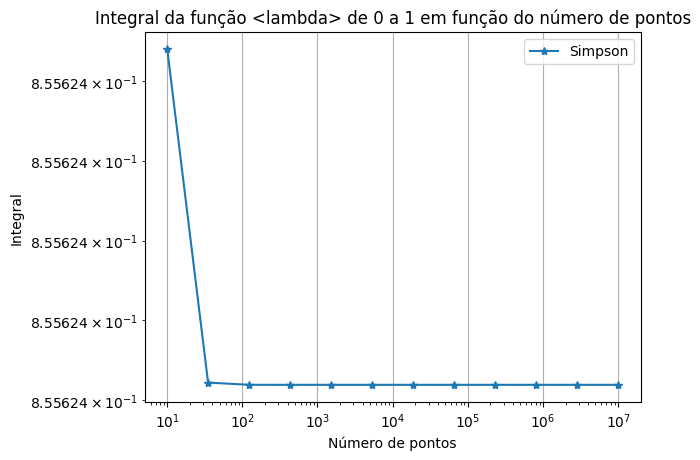

In [74]:
simpsonImpossible(lambda x: np.exp(-(x**2)/2), 0, 1)

In [75]:
simpson(lambda x: np.exp(-(x**2)/2), 0, 1, 10**3)

0.8556243918921496

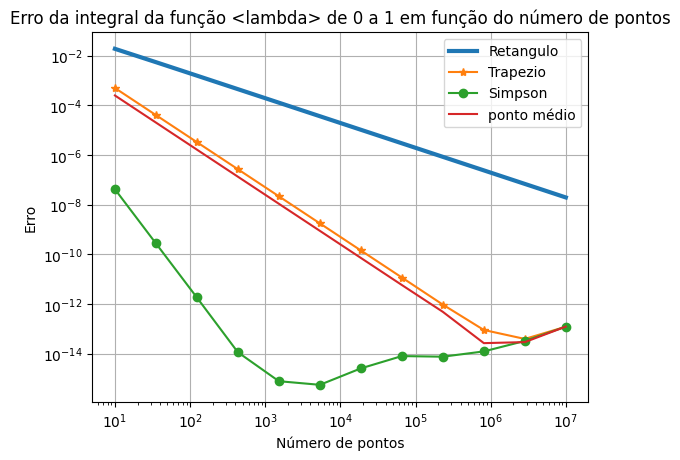

In [76]:
generateGraph(lambda x: np.exp(-(x**2)/2), 0, 1, simpson(lambda x: np.exp(-(x**2)/2), 0, 1, 10**3))

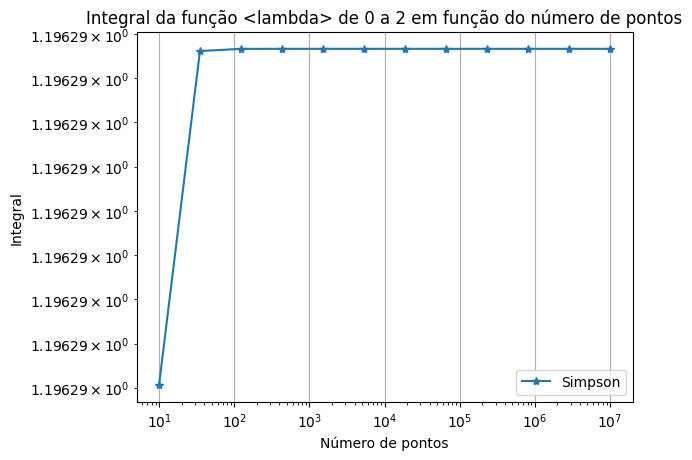

In [77]:
simpsonImpossible(lambda x: np.exp(-(x**2)/2), 0, 2)

In [78]:
simpson(lambda x: np.exp(-(x**2)/2), 0, 2, 10**3)

1.1962880133226075

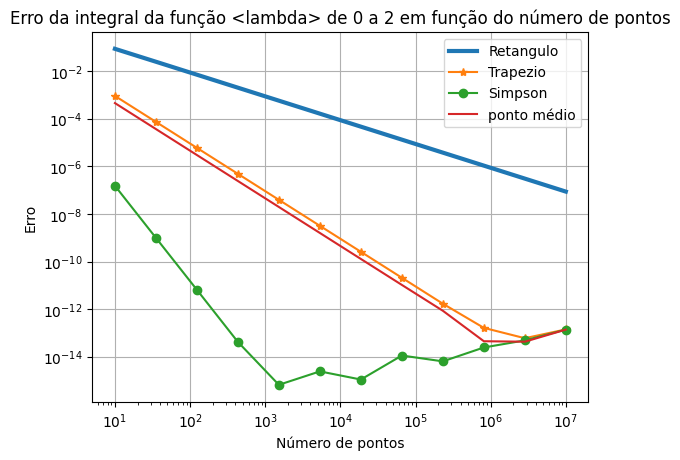

In [79]:
generateGraph(lambda x: np.exp(-(x**2)/2), 0, 2, simpson(lambda x: np.exp(-(x**2)/2), 0, 2, 10**3))

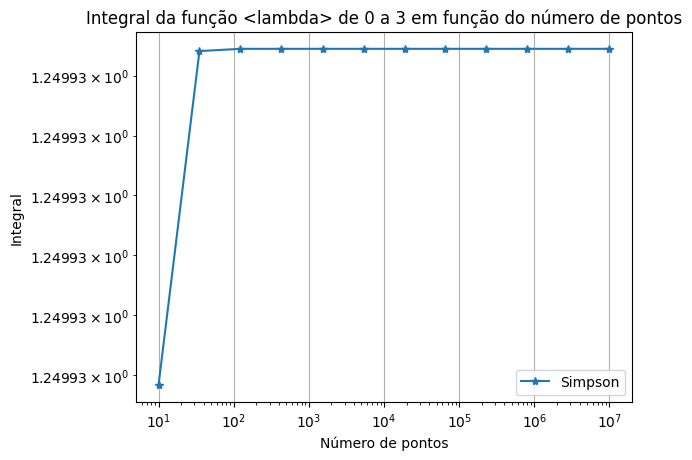

In [80]:
simpsonImpossible(lambda x: np.exp(-(x**2)/2), 0, 3)

In [81]:
simpson(lambda x: np.exp(-(x**2)/2), 0, 3, 10**3)

1.249930444741542

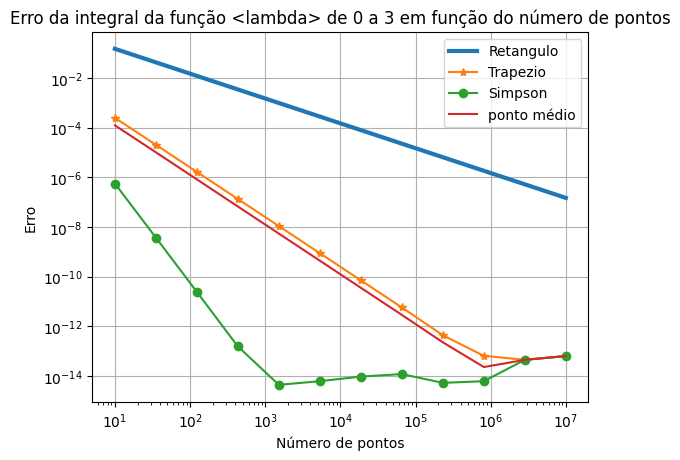

In [82]:
generateGraph(lambda x: np.exp(-(x**2)/2), 0, 3, simpson(lambda x: np.exp(-(x**2)/2), 0, 3, 10**3))